# Logistic Regression: Pass/Fail Test Prediction

This notebook implements a logistic regression model to predict whether a student passes or fails a test based on their score (0-100 scale).

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [75]:
# Generate sample data: test scores and pass/fail results
n_samples = 100

# Generate scores (0-100)
scores = np.random.uniform(0, 100, n_samples).reshape(-1, 1)

# Generate pass/fail (1/0) with some noise
# Higher scores have higher probability of passing
pass_probability = 1 / (1 + np.exp(-(scores.flatten() - 50) / 10))
pass_result = (np.random.random(n_samples) < pass_probability).astype(int)

# Train logistic regression model
model = LogisticRegression()
model.fit(scores, pass_result)

print(f"Pass rate: {pass_result.mean():.2%}")
print(f"Model coefficient: {model.coef_[0][0]:.4f}")
print(f"Model intercept: {model.intercept_[0]:.4f}")

Pass rate: 61.00%
Model coefficient: 0.1287
Model intercept: -6.1833


Predicted probability of passing for score 14.30: 1.28%
Prediction: Fail


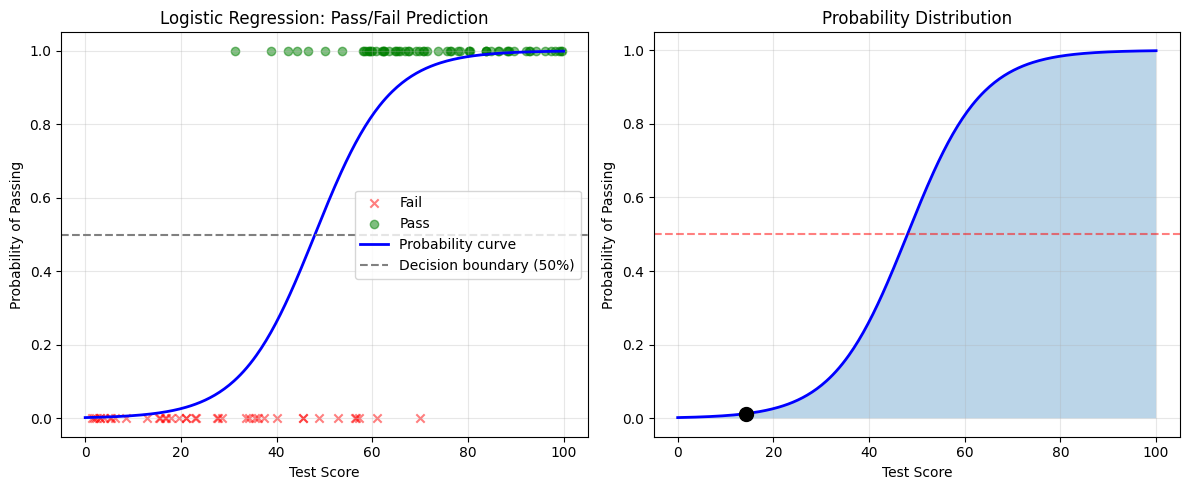

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 5))

# Plot 1: Data points and trained model sigmoid curve
plt.subplot(1, 2, 1)
plt.scatter(scores[pass_result==0], pass_result[pass_result==0], color='red', alpha=0.5, label='Fail', marker='x')
plt.scatter(scores[pass_result==1], pass_result[pass_result==1], color='green', alpha=0.5, label='Pass', marker='o')

# Create a range of scores for prediction
score_range = np.linspace(0, 100, 300).reshape(-1, 1)
# Use the trained model to predict probabilities
probabilities = model.predict_proba(score_range)[:, 1]

plt.plot(score_range, probabilities, 'b-', linewidth=2, label='Probability curve')
plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision boundary (50%)')
plt.xlabel('Test Score')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Pass/Fail Prediction')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Probability distribution
plt.subplot(1, 2, 2)
plt.plot(score_range, probabilities, 'b-', linewidth=2)
plt.fill_between(score_range.flatten(), 0, probabilities, alpha=0.3)
plt.xlabel('Test Score')
plt.ylabel('Probability of Passing')
plt.title('Probability Distribution')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)

# Add a random point to get result
score_to_predict = np.random.uniform(0, 100)
probability_of_passing = model.predict_proba([[score_to_predict]])[0, 1]
prediction = model.predict([[score_to_predict]])[0]
plt.plot(score_to_predict, probability_of_passing, 'ko', markersize=10, label='Prediction Point')
print(f"Predicted probability of passing for score {score_to_predict:.2f}: {probability_of_passing:.2%}")
print(f"Prediction: {'Pass' if prediction == 1 else 'Fail'}")

plt.tight_layout()
plt.show()